# DataMadness
## EDA (fancy plots)

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 18
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [97]:
db = pd.read_csv('db_clean/titles.csv')

In [98]:
db = db[db['startYear'] < 2023]

In [99]:
db['sex'] = 'male'
db.loc[db['primaryProfession'].str.contains('actress'), 'sex'] = 'female'
db.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,replicas,regions,nconst,primaryName,birthYear,deathYear,primaryProfession,averageRating,numVotes,sex
0,tt0029284,movie,My Favorite Wife,My Favorite Wife,0,1940,1940,88,"['Comedy', 'Romance']",48.0,"['FR', 'PL', 'HU', 'JP', 'ZA', 'XWW', 'AT', 'H...",nm0098850,Bouboule,1916,2015,actress,7.3,10977,female
1,tt0029284,movie,My Favorite Wife,My Favorite Wife,0,1940,1940,88,"['Comedy', 'Romance']",48.0,"['FR', 'PL', 'HU', 'JP', 'ZA', 'XWW', 'AT', 'H...",nm0253767,Lourdes Elizarrarás,1959,2024,"actress,writer,assistant_director",7.3,10977,female
2,tt0029284,movie,My Favorite Wife,My Favorite Wife,0,1940,1940,88,"['Comedy', 'Romance']",48.0,"['FR', 'PL', 'HU', 'JP', 'ZA', 'XWW', 'AT', 'H...",nm0459441,Rikki Klieman,1948,2024,"actress,editorial_department",7.3,10977,female
3,tt0031359,movie,Gaslight,Gaslight,0,1940,1940,84,"['Mystery', 'Thriller']",19.0,"['PL', 'DE', 'HU', 'ES', 'FR', 'NL', 'US', 'BR...",nm0131808,Joe Camilleri,1948,2024,"actor,soundtrack,composer",7.3,4856,male
4,tt0031359,movie,Gaslight,Gaslight,0,1940,1940,84,"['Mystery', 'Thriller']",19.0,"['PL', 'DE', 'HU', 'ES', 'FR', 'NL', 'US', 'BR...",nm0268426,Betty Farrington,1898,1989,"actress,soundtrack",7.3,4856,female
5,tt0031359,movie,Gaslight,Gaslight,0,1940,1940,84,"['Mystery', 'Thriller']",19.0,"['PL', 'DE', 'HU', 'ES', 'FR', 'NL', 'US', 'BR...",nm0619867,Marcos Najera,1972,2024,"actor,script_department",7.3,4856,male
6,tt0031976,movie,The Stars Look Down,The Stars Look Down,0,1940,1940,110,['Drama'],22.0,"['CSHH', 'HR', 'DK', 'BE', 'FI', 'JP', 'NL', '...",nm0249509,Noel Edmonds,1948,2024,"writer,actor,soundtrack",7.0,1108,male
7,tt0031976,movie,The Stars Look Down,The Stars Look Down,0,1940,1940,110,['Drama'],22.0,"['CSHH', 'HR', 'DK', 'BE', 'FI', 'JP', 'NL', '...",nm0584400,Kasper Michaels,1967,2024,actor,7.0,1108,male
8,tt0032181,movie,Abe Lincoln in Illinois,Abe Lincoln in Illinois,0,1940,1940,110,"['Biography', 'Drama', 'History']",22.0,"['BE', 'FR', 'GR', 'SE', 'BE', 'FI', 'PT', 'JP...",nm0182615,Sue Costello,1968,2024,"actress,writer,producer",7.3,1923,female
9,tt0032186,movie,Youre Missing the Point,Ahí está el detalle,0,1940,1940,112,['Comedy'],14.0,"['PT', 'BR', 'XYU', 'BR', 'XWW', 'MX', 'PL', '...",nm0083266,Jesper Birch,1963,2024,"actor,miscellaneous",8.0,1396,male


In [100]:
byYear = db.groupby('startYear').agg({
    'averageRating':'mean',
    'numVotes':'sum',
    'sex': lambda e: [sum(e == 'male'), sum(e =='female')]
})
byYear['males'] = byYear['sex'].apply(lambda e: e[0])
byYear['females'] = byYear['sex'].apply(lambda e: e[1])
byYear

,averageRating,numVotes,sex,males,females
startYear,,,,,
1940,7.043519,2988205,"[60, 48]",60,48
1941,7.169355,6017525,"[81, 43]",81,43
1942,7.167257,6530892,"[77, 36]",77,36
1943,6.842157,598483,"[67, 35]",67,35
1944,6.879487,2170773,"[74, 43]",74,43
1945,7.161404,1351869,"[78, 36]",78,36
1946,6.996429,2784300,"[94, 46]",94,46
1947,7.133333,1220644,"[81, 42]",81,42
1948,7.280000,1501359,"[90, 50]",90,50


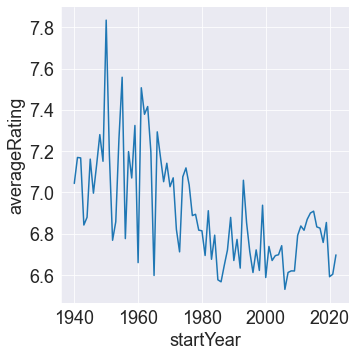

In [101]:
sns.relplot(x='startYear', y='averageRating', data=byYear, kind='line')

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

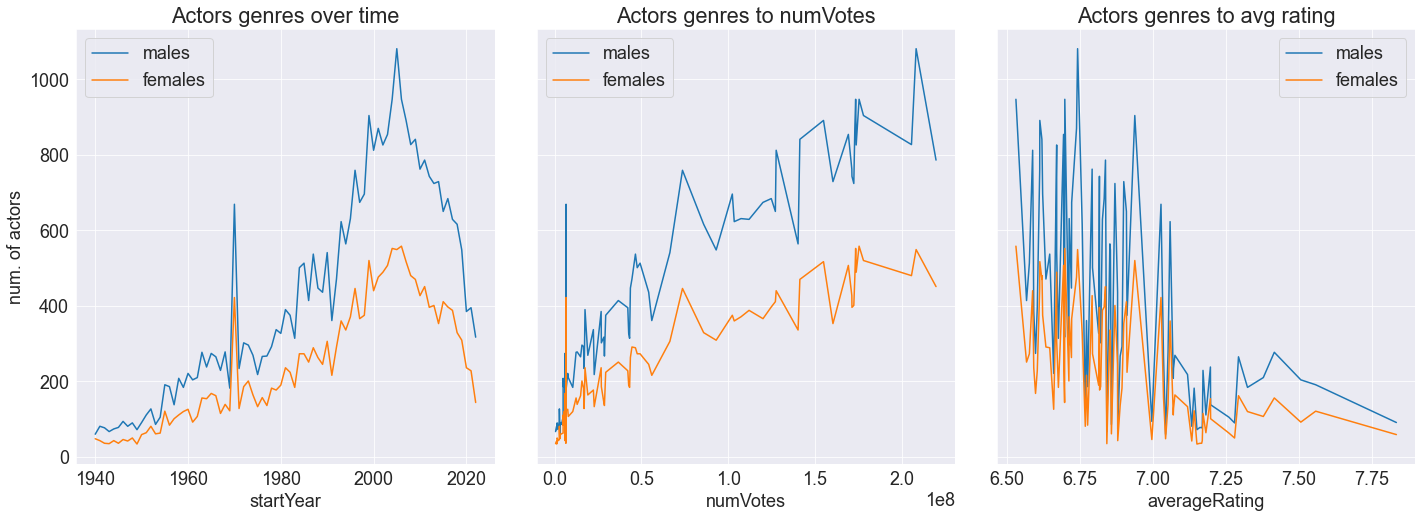

In [102]:
fig, axs = plt.subplots(ncols=3, sharey='row', figsize=(24,8))
sns.lineplot(x='startYear', y='males', data=byYear, ax=axs[0])
sns.lineplot(x='startYear', y='females', data=byYear, ax=axs[0])
axs[0].legend(['males','females'])
axs[0].set_ylabel('num. of actors')
axs[0].set_title('Actors genres over time')


sns.lineplot(x='numVotes', y='males', data=byYear, ax=axs[1])
sns.lineplot(x='numVotes', y='females', data=byYear, ax=axs[1])
axs[1].legend(['males','females'])
axs[1].set_ylabel('num. of actors')
axs[1].set_title('Actors genres to numVotes')

sns.lineplot(x='averageRating', y='males', data=byYear, ax=axs[2])
sns.lineplot(x='averageRating', y='females', data=byYear, ax=axs[2])
axs[2].legend(['males','females'])
axs[2].set_ylabel('num. of actors')
axs[2].set_title('Actors genres to avg rating')

plt.subplots_adjust(wspace=0.1)
plt.tight_layout

In [103]:
db.shape

(55099, 19)

<AxesSubplot:xlabel='averageRating', ylabel='sex'>

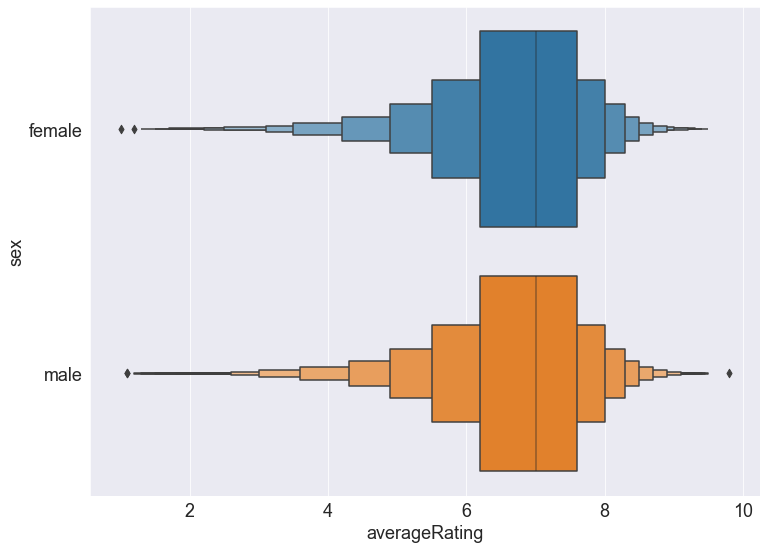

In [104]:
sns.boxenplot(data=db, x='averageRating', y='sex')

### Distribution of Average Rating variable
The variable we want to get insights on

C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ignacio\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


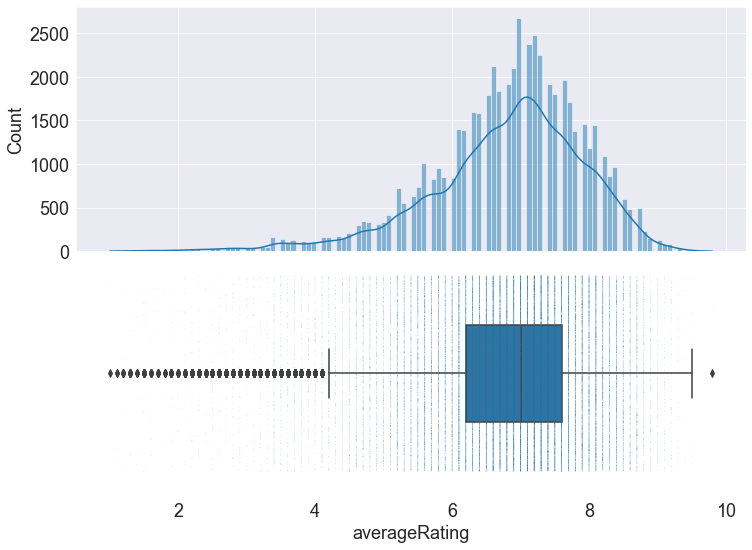

In [105]:
fig1, axs = plt.subplots(nrows=2)

sns.histplot(db['averageRating'], kde=True, ax=axs[0])
sns.stripplot(db['averageRating'], orient='h', jitter=0.4, size=.8, ax=axs[1], alpha=0.2)
sns.boxplot(db['averageRating'], orient='h', width=0.4, ax=axs[1], showfliers=True)

spacer = np.max(db['averageRating']) * 0.05
xmin = np.min(db['averageRating']) - spacer
xmax = np.max(db['averageRating']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

plt.subplots_adjust(hspace=0)
axs[1].set_facecolor('white')

#### Compare to Number of Votes

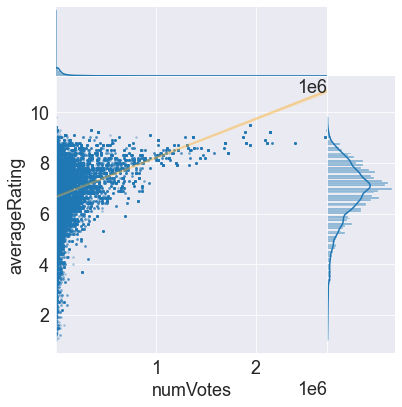

In [106]:
sns.jointplot(
    x='numVotes', y='averageRating', data=db, kind="reg", ratio=4, space=0,
    scatter_kws={'s': 3,'alpha': 0.25}, line_kws={'color': 'orange', 'alpha':0.3}
)

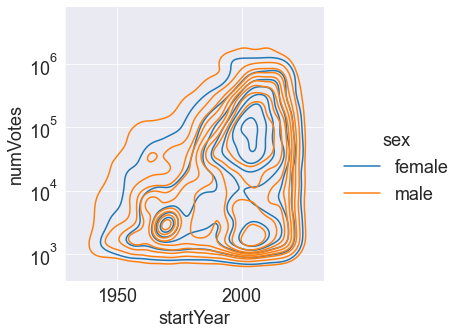

In [107]:
sns.displot(db, x='startYear', y='numVotes', hue='sex', kind='kde', log_scale=(False,True))

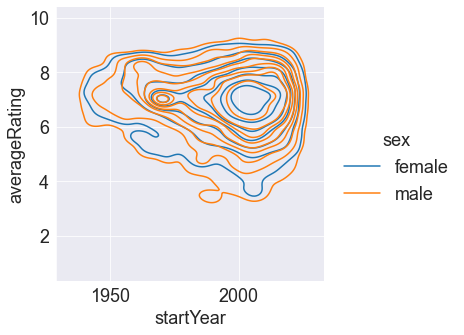

In [108]:
sns.displot(db, x='startYear', y='averageRating', hue='sex', kind='kde')

In [109]:
regions = db[['tconst', 'regions', 'averageRating', 'numVotes']].groupby('tconst').agg('first')
dictz = {
    '[':'',
    ']':'',
    '\'':''
}
for k,v in dictz.items():
    regions.regions = regions['regions'].str.replace(k, v)

regions.regions = regions['regions'].str.split(',')
regions = regions.explode('regions')
byRegion = regions.groupby('regions').agg(
    {'averageRating': 'mean', 'numVotes': 'sum'}
).reset_index().sort_values('numVotes', ascending=False)
byRegion.head(30)

<ipython-input-109-f088f39e6345>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  regions.regions = regions['regions'].str.replace(k, v)


,regions,averageRating,numVotes
19,CA,6.664228,1851421682
54,IN,6.845455,1845376258
121,US,6.524618,1820077894
60,JP,6.700822,1400780875
45,GR,6.561636,1379819482
39,ES,6.606099,1156637212
40,FI,6.698400,1077576919
16,BR,6.568750,1015351692
32,DE,6.583406,1006243056
42,GB,6.562087,1002411254


In [110]:
len(byRegion.regions.unique())

242

votes come from 243 different regions

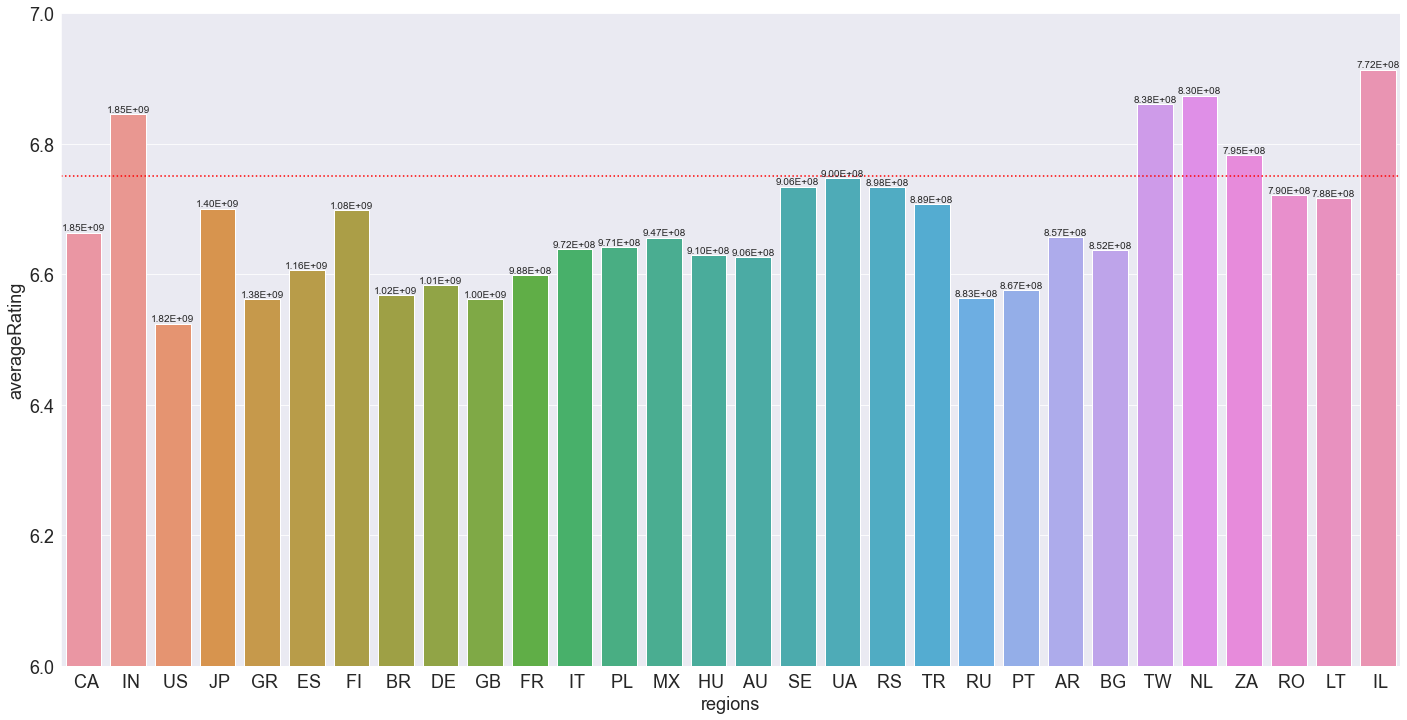

In [111]:
fig, ax = plt.subplots(figsize=(24, 12))
sns.barplot(x='regions', y='averageRating', data = byRegion.head(30), ax=ax)
ax.axhline(y=byRegion['averageRating'].median(), color='red', linestyle='dotted')
ax.set_ylim((6,7))

for i,patch in enumerate(ax.patches):
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    tick = ax.xaxis.get_majorticklabels()[i].get_text()
    votes = int(byRegion[byRegion['regions'] == tick].numVotes)
    ax.annotate(f'{votes:.2E}', (x.mean(), y), ha='center', va='bottom', size=10)


## Region
Display categorical region value together with the count of averageRating labels to determine which region has higher rate of vote in the db, then compare it to the average rating of the region itself.

### Correlation of numeric variables
This shows averageRating being correlated to numVotes which makes sense, and startYear to endYear (again understandable).
Small correlation also between runtimeMinutes and averageRating: *investigate*

<AxesSubplot:>

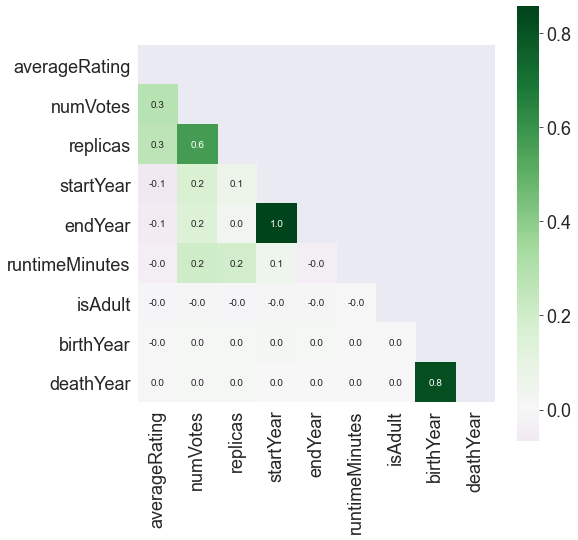

In [112]:
dset = db
s = dset.corr().loc[:, 'averageRating'].abs().sort_values(ascending=False)
s = dset.loc[:, list(s.index)].corr()
mask = np.zeros_like(s)
mask[np.triu_indices_from(mask)] = 1
plt.figure(figsize=(8, 8))
sns.heatmap(s, mask=mask, square=True, cmap='PRGn', center=0, robust=True, annot=True, annot_kws={"size":10}, fmt='.1f')

### pairplot for numerical variables

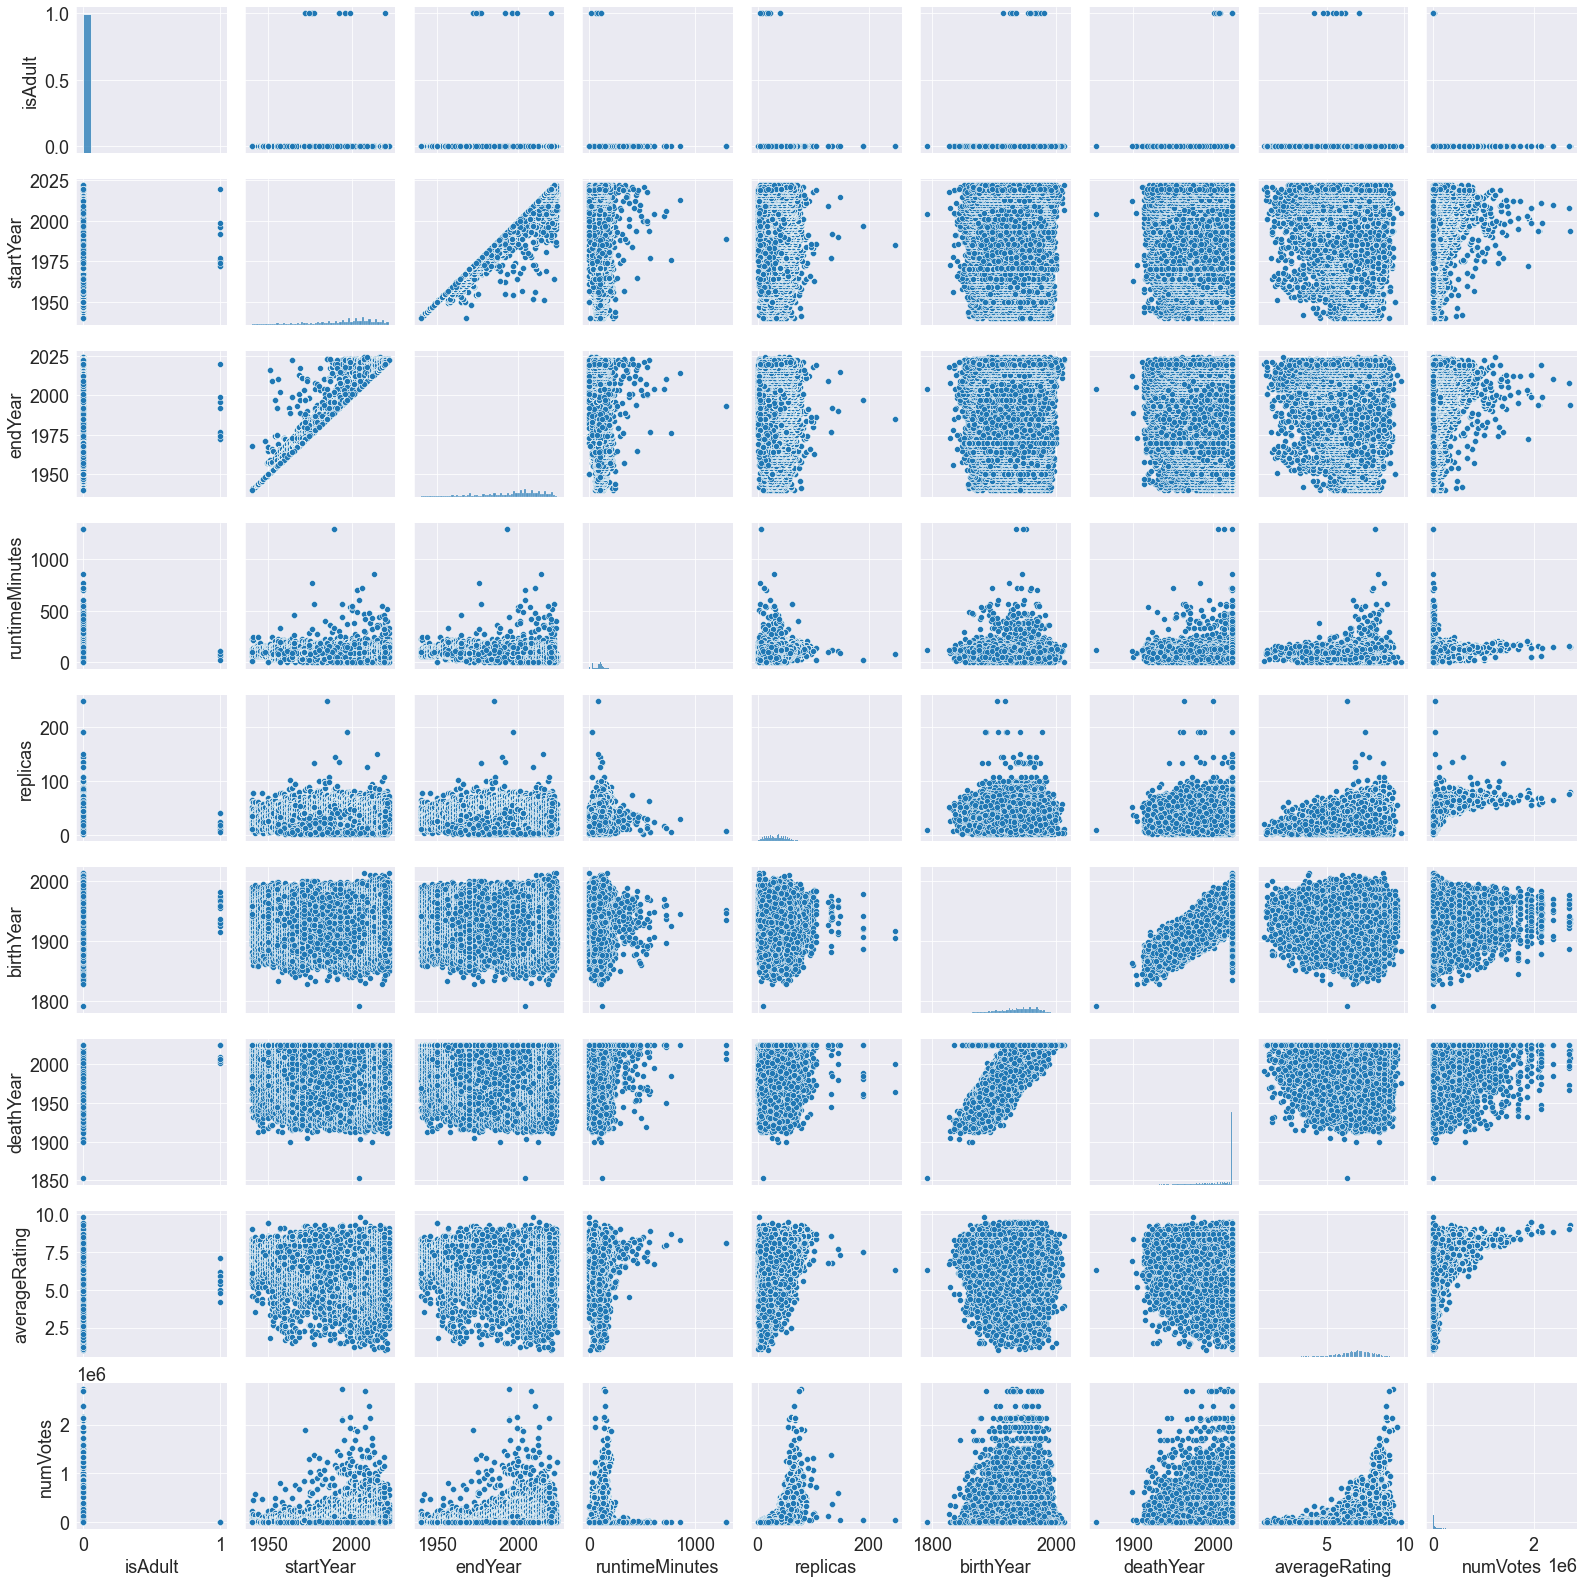

In [113]:
numeric = db.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
sns.pairplot(numeric)

### Most recurrent titles
series with high number of episodes, or movies with many replicas

In [114]:
aggregator = {'replicas':'max','averageRating':'mean', 'numVotes':'sum', 'startYear':'first'}
byReplicas = db.groupby('primaryTitle').agg(aggregator).sort_values('replicas', ascending = False)
byReplicas.head(25)

,replicas,averageRating,numVotes,startYear
primaryTitle,,,,
The Black Cauldron,247.0,6.300000,75714,1985
Pokémon,190.0,7.500000,311521,1997
Shaun the Sheep Movie,149.0,7.300000,41711,2015
Home Alone,144.0,7.700000,3600822,1990
Home Alone 2: Lost in New York,134.0,6.800000,1860930,1992
Star Wars: Episode IV - A New Hope,132.0,8.600000,17956276,1977
A Christmas Carol,126.0,7.692308,452009,1951
Aliens,106.0,8.400000,6541596,1986
Demon Slayer: Kimetsu no Yaiba,106.0,8.700000,224242,2019


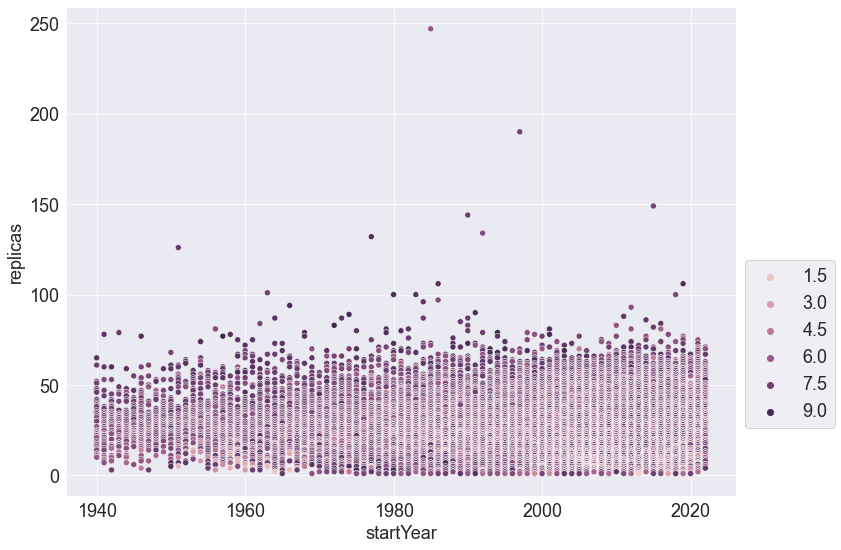

In [115]:
sns.cubehelix_palette(n_colors=6, light=0.5)
sns.scatterplot(x='startYear', y='replicas', hue='averageRating', data=byReplicas)
plt.legend(bbox_to_anchor=(1,0.5))

### Top-rated titles
titles where averageRating is the highest

In [116]:
aggregator = {'tconst':'first', 'startYear':'first','averageRating':'mean','numVotes':'sum'}
bestMovies = db.groupby('primaryTitle').agg(aggregator).reset_index().sort_values('averageRating', ascending=False)
bestMovies.head(20)

,primaryTitle,tconst,startYear,averageRating,numVotes
3099,Choufli Hal,tt7151672,2005,9.8,2596
2484,Breaking Bad,tt0903747,2008,9.5,29188905
5368,Formula 1,tt6758316,1950,9.4,51744
16652,The Shawshank Redemption,tt0111161,1994,9.3,5436804
11161,Pretenders,tt0316613,2002,9.3,10118
15452,The Joy of Painting,tt0383795,1983,9.3,5652
17238,The Wire,tt0306414,2002,9.3,4873442
15021,The Godfather,tt0068646,1972,9.2,20777405
11257,Prosjaci i sinovi,tt0066704,1971,9.2,1011
17276,The World at War,tt0071075,1973,9.2,26538


### Top-rated actors
based on movie ratings

In [117]:
top_actors = db.groupby(['tconst']).aggregate({
    'primaryName':lambda e: ', '.join(e.unique()),
    'primaryTitle':lambda e: ', '.join(e.unique()),
    'startYear': 'min',
    'averageRating':'max',
    'numVotes':'max'
})

In [118]:
top_actors.sort_values('averageRating',ascending=False).head(20)

,primaryName,primaryTitle,startYear,averageRating,numVotes
tconst,,,,,
tt7151672,William Austin,Choufli Hal,2005,9.8,2596
tt0903747,"Catarina Abdalla, Juli Cantó, Igor Cavalera, M...",Breaking Bad,2008,9.5,1945927
tt6758316,"Pierre Badel, Bonnie Bianco, Joan Frank, Jack ...",Formula 1,1950,9.4,3234
tt0306414,"Hans Abich, Alex Barad, Philip L. Boddy, Elio,...",The Wire,2002,9.3,348103
tt9471404,Wanda Luczycka,The Chosen,2017,9.3,34549
tt0383795,Barry Sobel,The Joy of Painting,1983,9.3,5652
tt0111161,"Burt Reynolds, Mary Langan",The Shawshank Redemption,1994,9.3,2718402
tt0316613,"Emil Bruun, Tat-Ming Cheung",Pretenders,2002,9.3,5059
tt0077051,"Michael Bates, Gernot Bock-Stieber, Dieter Boh...",Matador,1978,9.3,4983


In [119]:
top_actors.sort_values('numVotes' , ascending=False).head(20)

,primaryName,primaryTitle,startYear,averageRating,numVotes
tconst,,,,,
tt0111161,"Burt Reynolds, Mary Langan",The Shawshank Redemption,1994,9.3,2718402
tt0468569,"Sela Ward, Robert Carradine, Troy Donahue, Ton...",The Dark Knight,2008,9.0,2691140
tt1375666,"Timothy Hutton, Laura Gemser, Don Buchsbaum, T...",Inception,2010,8.8,2388309
tt0137523,"Brian Robbins, Liz Torres, Tânia Gomide, Edgar...",Fight Club,1999,8.8,2161922
tt0944947,"Ben Chaplin, Wilda Bieber, Mikhail Bolduman, A...",Game of Thrones,2011,9.2,2141380
tt0109830,"Colm Meaney, Kerim Afsar, Luis Alcoriza, Kurti...",Forrest Gump,1994,8.8,2113276
tt0110912,"George Peppard, Victoria Principal, Barbara Ba...",Pulp Fiction,1994,8.9,2087527
tt0903747,"Catarina Abdalla, Juli Cantó, Igor Cavalera, M...",Breaking Bad,2008,9.5,1945927
tt0133093,"Ian Abercrombie, Persis Khambatta, Patrick Mul...",The Matrix,1999,8.7,1938760


# HOW GENRE POPULARITY CHANGED OVER TIME
We can visualize the popularity of genres for every year since 1930 till today. We will do this by making an area chart.

In [120]:
aggregator = {'tconst':'first', 'startYear':'first','averageRating':'mean','numVotes':'first','genres':'first'}
movie_genres = db.groupby('primaryTitle').agg(aggregator).reset_index()
movie_genres.head()

,primaryTitle,tconst,startYear,averageRating,numVotes,genres
0,(T)Raumschiff Surprise - Periode 1,tt0349047,2004,5.4,16083,"['Comedy', 'Sci-Fi']"
1,*batteries not included,tt0092494,1987,6.6,36409,"['Comedy', 'Family', 'Fantasy']"
2,...And God Created Woman,tt0049189,1956,6.3,8777,"['Drama', 'Romance']"
3,.45,tt0259822,2006,5.5,8702,"['Crime', 'Drama', 'Thriller']"
4,.hack//SIGN,tt0361140,2002,6.8,1361,"['Action', 'Adventure', 'Animation']"


In [121]:
# Here we count the number of occurrences of each genre per year
def count_word_occurrences(s):
    word_counts = {}
    s = s[1:len(s)-1]
    words = s.split(', ')
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

# Group the dataframe by decade and apply the function to count the word occurrences
final_counts = []
grouped_by_decade = movie_genres.groupby((movie_genres['startYear']))
for year, group in grouped_by_decade:
    total_word_counts = {}
    for word_counts in group['genres'].apply(lambda x: count_word_occurrences(x)):
        for word, count in word_counts.items():
            if word in total_word_counts:
                total_word_counts[word] += count
            else:
                total_word_counts[word] = count
    sorted_word_counts = dict(sorted(total_word_counts.items(), key=lambda item: item[1], reverse=True))
    final_counts.append(sorted_word_counts)

In [122]:
# Convert the dictionaries to dataframes and stack them
dfs_by_year = [pd.DataFrame.from_dict(d, orient='index', columns=[f'{year}']) for year, d in enumerate(final_counts, start=1940)]
df_stacked = pd.concat(dfs_by_year, axis=1)
df_stacked = df_stacked.fillna(0)
df_normed = df_stacked.div(df_stacked.sum(axis=0), axis=1)

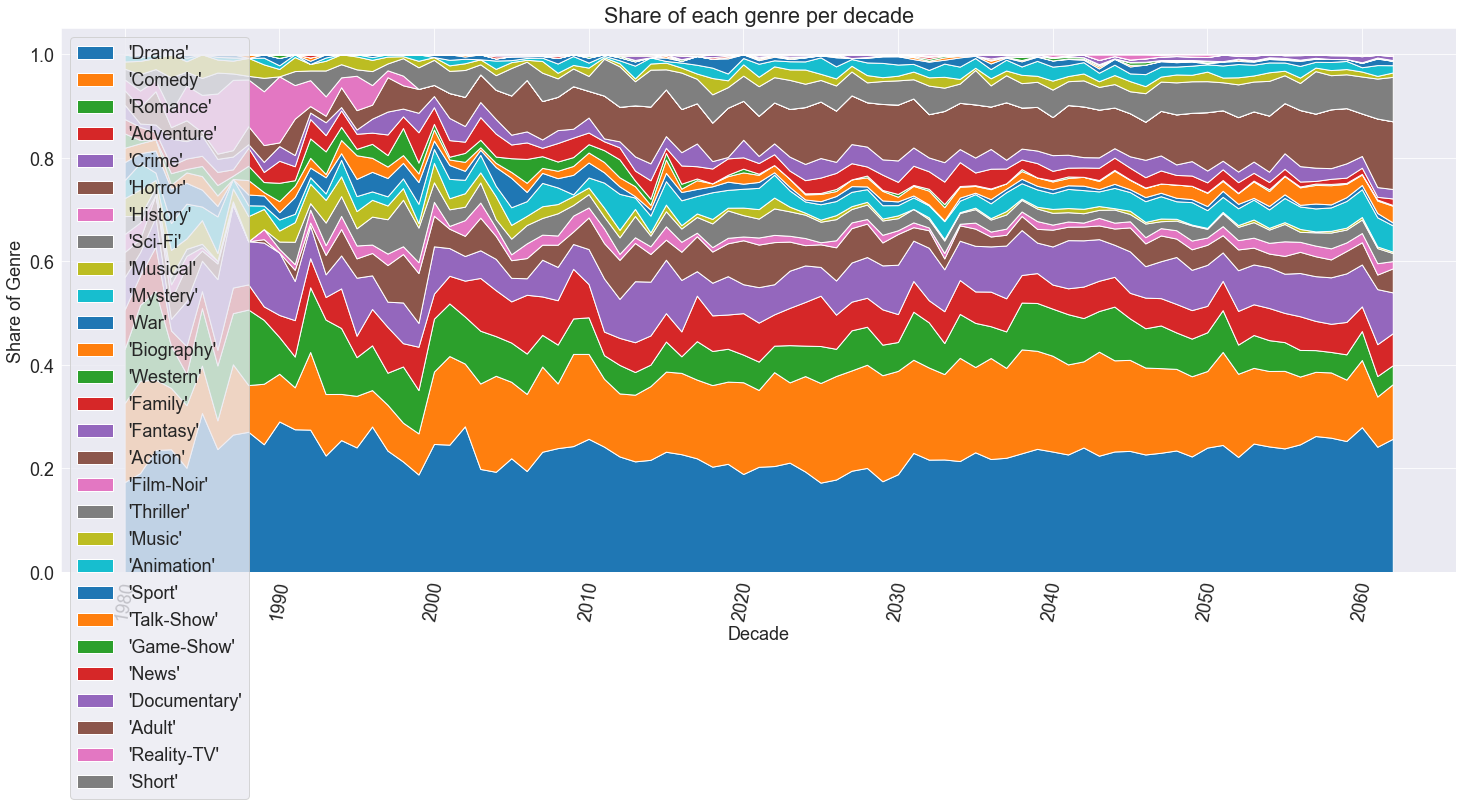

In [123]:
# Create stacked band plot
plt.figure(figsize=(25, 10))
plt.stackplot(df_normed.columns, df_normed.values, labels=df_normed.index)
# Add legend and axis labels
plt.legend(loc='upper left')
plt.xlabel('Decade')
plt.ylabel('Share of Genre')
plt.title('Share of each genre per decade')
plt.xticks(df_normed.columns[0::10],rotation = 80)
# Show the plot
plt.show()

The evolution of movie genres over time is a fascinating subject that sheds light on the shifting tastes and interests of audiences. While some genres have remained perennially popular, such as drama and romance, others have risen to prominence and then faded away. For example, action and horror films have enjoyed a surge in popularity since the 1970s,which was fueled by advances in special effects and a growing appetite for high-octane, adrenaline-fueled entertainment. Another example is film noir, a brief but influential trend that emerged in the 1940s, it is a dark and moody genre that reflected the anxieties and uncertainties of the time.

# THE RELATIONSHIP BETWEEN GENRE AND RATINGS
To study how the distribution of ratings for each genre we can create a boxplot for each one.

In [124]:
genres = pd.DataFrame(columns = ['genre1', 'genre2', 'genre3','rating'])
genres[['genre1', 'genre2', 'genre3']] = movie_genres['genres'].str.split(',', expand=True)
genres['rating'] = movie_genres.averageRating

genres['genre1'] = genres['genre1'].map(lambda x: x.lstrip('[').rstrip(']') if x is not None else x)
genres['genre2'] = genres['genre2'].map(lambda x: x.lstrip(' ').rstrip(']') if x is not None else x)
genres['genre3'] = genres['genre3'].map(lambda x: x.lstrip(' ').rstrip(']') if x is not None else x)
genres.head()

,genre1,genre2,genre3,rating
0,'Comedy','Sci-Fi',None,5.4
1,'Comedy','Family','Fantasy',6.6
2,'Drama','Romance',None,6.3
3,'Crime','Drama','Thriller',5.5
4,'Action','Adventure','Animation',6.8


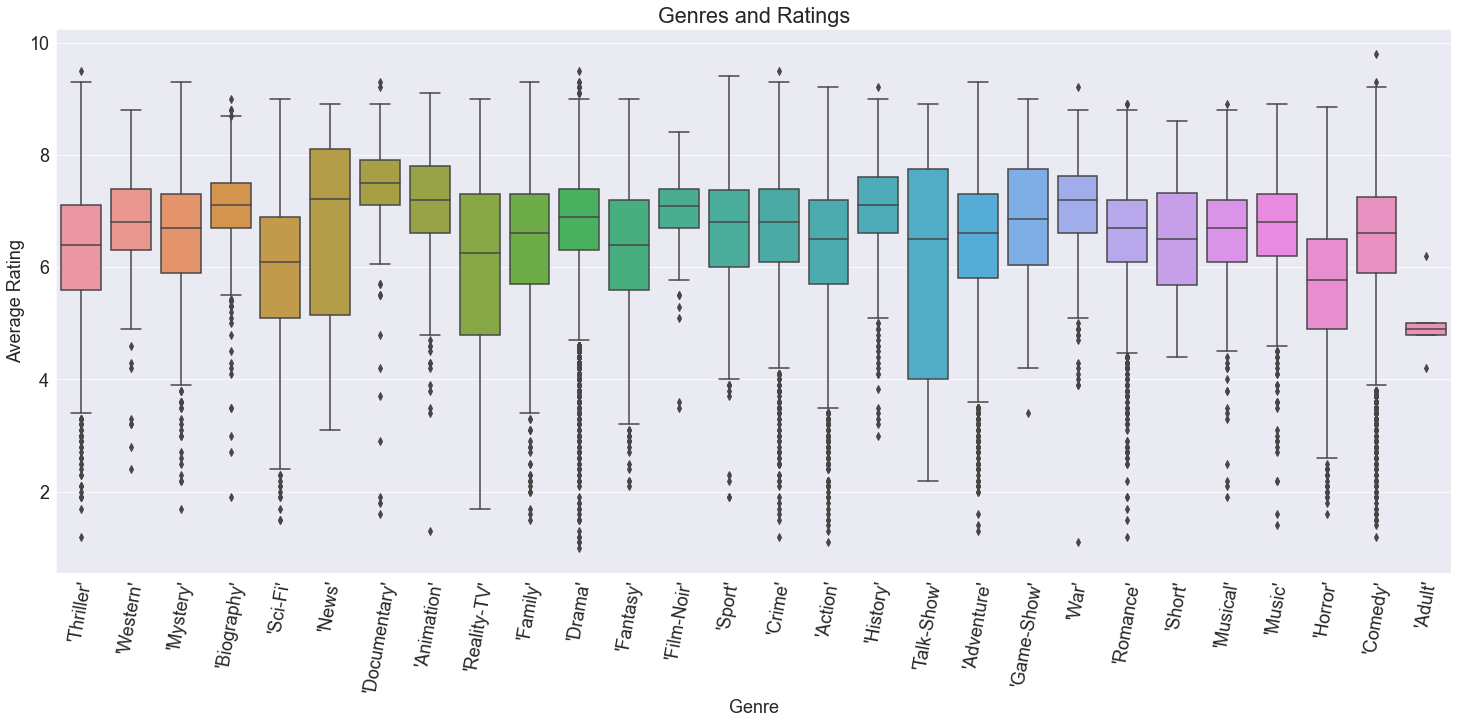

In [125]:
# Get unique genres
unique_genres = set(genres['genre1'].unique().tolist() + genres['genre2'].unique().tolist() + genres['genre3'].unique().tolist())
unique_genres.discard(None)

# Group by genre and extract ratings as arrays
genre_ratings = []
for genre in unique_genres:
    ratings = genres.loc[(genres['genre1'] == genre) | (genres['genre2'] == genre) | (genres['genre3'] == genre), 'rating'].values
    genre_ratings.append(ratings)

plt.figure(figsize=(25, 10))
sns.boxplot(data=genre_ratings)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Genres and Ratings')
plt.gca().set_xticklabels(unique_genres)
plt.xticks(rotation = 80)
plt.show()